<a href="https://colab.research.google.com/github/rajni0829/Object-Detection-From-Video/blob/main/Copy_of_Object_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Given an image, detect objects in the frame & predict their category class.

In [2]:
%tensorflow_version 1.x
import tensorflow
print(tensorflow.__version__)

1.15.2


In [3]:
# !pip uninstall keras==2.3.0
# !pip install keras==2.2.0


In [4]:
# Importing Libraries
import numpy as np
import warnings
from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling3D
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras import backend as K
from __future__ import print_function
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
# from keras.applications.imagenet_utils import _obtain_input_shape 


Using TensorFlow backend.


In [5]:
# !pip install keras.engine.topology 

In [7]:
# import splitfolders
# input_dir = "/content/drive/MyDrive/dataset"                # original dataset
# output_dir = "/content/drive/MyDrive/SplittedDataset"       # training & testing dataset 

# splitfolders.ratio(input_dir, output_dir, seed=1337, ratio=(.6,.4), group_prefix=None)

In [8]:
# train_dir = "/content/drive/MyDrive/SplittedDataset/train"
# valid_dir = "/content/drive/MyDrive/SplittedDataset/val"


**Parameter Explanation**    *(conv,activation,name,i/p)*   
  - Layers : (64 filters of 3x3 matrix) (conv, relu, pool)  
  - padding: size of o/p image = size of i/p image  
  - relu: activation func (replaces neg val with 0)  
  - pooling: reduces size of image  
  - Here in blocks ,o/p of 1st is the i/p next.


In [9]:
def VGGupdated(input_tensor=None,classes=2):    
   
    img_rows, img_cols = 300, 300   
    img_channels = 3       # colored images

    img_dim = (img_rows, img_cols, img_channels)  # 300,300,3
   
    img_input = Input(shape=img_dim)
    

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)
    # CNN Network Accomplihshed

    
    # Now, reducing dimension of image using flatten from keras
    # Classification block
    x = Flatten(name='flatten')(x)
    x = Dense(4096, activation='relu', name='fc1')(x)   #no(neurons) = 4096
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dense(classes, activation='softmax', name='predictions')(x)           # loss='categorical_crossentropy'
    # softmax will calculate the prob val: image having higher prob will belong to that class


    # Create model.     
    model = Model(inputs = img_input, outputs = x, name='VGG Model')

    return model



In [10]:
# from tensorflow.python.framework import ops
# ops.reset_default_graph()

In [11]:
# calling created model

# import tensorflow as tf
# tf.compat.v1.get_default_graph()
model = VGGupdated(classes = 2) 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [12]:
# Showing architecture & layers of model
model.summary()

Model: "VGG Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 300, 300, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0 

In [13]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('/content/drive/MyDrive/dataset/neww')

room_types = os.listdir('/content/drive/MyDrive/dataset/neww')
print (room_types)  #what kinds of rooms are in this dataset

print("Types of rooms found: ", len(dataset_path))


['dolphin', 'ant']
Types of rooms found:  2


In [15]:
rooms = []

for item in room_types:
 # Get all the file names
 all_rooms = os.listdir('/content/drive/MyDrive/SplittedDataset/train' + '/' +item)
 #print(all_shoes)

 # Add them to the list
 for room in all_rooms:
    rooms.append((item, str('/content/drive/MyDrive/SplittedDataset/train' + '/' +item) + '/' + room))
    print(rooms)

[('dolphin', '/content/drive/MyDrive/SplittedDataset/train/dolphin/image_0022.jpg')]
[('dolphin', '/content/drive/MyDrive/SplittedDataset/train/dolphin/image_0022.jpg'), ('dolphin', '/content/drive/MyDrive/SplittedDataset/train/dolphin/image_0060.jpg')]
[('dolphin', '/content/drive/MyDrive/SplittedDataset/train/dolphin/image_0022.jpg'), ('dolphin', '/content/drive/MyDrive/SplittedDataset/train/dolphin/image_0060.jpg'), ('dolphin', '/content/drive/MyDrive/SplittedDataset/train/dolphin/image_0005.jpg')]
[('dolphin', '/content/drive/MyDrive/SplittedDataset/train/dolphin/image_0022.jpg'), ('dolphin', '/content/drive/MyDrive/SplittedDataset/train/dolphin/image_0060.jpg'), ('dolphin', '/content/drive/MyDrive/SplittedDataset/train/dolphin/image_0005.jpg'), ('dolphin', '/content/drive/MyDrive/SplittedDataset/train/dolphin/image_0039.jpg')]
[('dolphin', '/content/drive/MyDrive/SplittedDataset/train/dolphin/image_0022.jpg'), ('dolphin', '/content/drive/MyDrive/SplittedDataset/train/dolphin/image

In [16]:
# Building a dataframe  
      
rooms_df = pd.DataFrame(data=rooms, columns=['room type', 'image'])
print(rooms_df.head())
print(rooms_df.tail())

  room type                                              image
0   dolphin  /content/drive/MyDrive/SplittedDataset/train/d...
1   dolphin  /content/drive/MyDrive/SplittedDataset/train/d...
2   dolphin  /content/drive/MyDrive/SplittedDataset/train/d...
3   dolphin  /content/drive/MyDrive/SplittedDataset/train/d...
4   dolphin  /content/drive/MyDrive/SplittedDataset/train/d...
   room type                                              image
55       ant  /content/drive/MyDrive/SplittedDataset/train/a...
56       ant  /content/drive/MyDrive/SplittedDataset/train/a...
57       ant  /content/drive/MyDrive/SplittedDataset/train/a...
58       ant  /content/drive/MyDrive/SplittedDataset/train/a...
59       ant  /content/drive/MyDrive/SplittedDataset/train/a...


In [17]:

# Let's check how many samples for each category are present
print("Total number of rooms in the dataset: ", len(rooms_df))
room_count = rooms_df['room type'].value_counts()
print("rooms in each category: ")
print(room_count)


Total number of rooms in the dataset:  60
rooms in each category: 
dolphin    40
ant        20
Name: room type, dtype: int64


In [18]:

import cv2
path = '/content/drive/MyDrive/SplittedDataset/train/'


im_size = 300

images = []
labels = []

for i in room_types:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]   # accessing image
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)         # reading image
        img = cv2.resize(img, (im_size, im_size))     # resizing image
        images.append(img)
        labels.append(i)

In [19]:
# Convertig resizing images into array
images = np.array(images)

images = images.astype('float32') / 255.0   # pixel density division range [0,225]
images.shape    


(60, 300, 300, 3)

In [20]:
# Label Encoding (to convert strings into categorical numericals)
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=rooms_df['room type'].values
#print(y[:5])

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np 

y=y.reshape(-1,1)
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
Y = np.array(ct.fit_transform(y))
Y.shape

(60, 2)

In [22]:
# Converting scalar output into vector output 
# where the correct class will be 1 and other will be 0
# y=y.reshape(-1,1)

# class sklearn.preprocessing.OneHotEncoder(categories='auto', drop=None, sparse=True, dtype=<class 'numpy.float64'>, handle_unknown='error')
# onehotencoder = OneHotEncoder(categorical_features=[0]) 
# onehotencoder = OneHotEncoder(categories=[0])  
# onehotencoder = OneHotEncoder(sparse=False) 

# Y= onehotencoder.fit_transform(y)
# Y.shape  #(40, 2)


In [23]:
# from sklearn.utils import shuffle
# from sklearn.model_selection import train_test_split


# images, Y = shuffle(images, Y, random_state=1)

# train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

# #inpect the shape of the training and testing.
# print(train_x.shape)
# print(train_y.shape)
# print(test_x.shape)
# print(test_y.shape)

In [24]:
# Preparing Testing Images

import cv2
path = '/content/drive/MyDrive/dataset/neww/'


im_size = 300

test_images = []
test_labels = []

for i in room_types:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]   # accessing image
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)         # reading image
        img = cv2.resize(img, (im_size, im_size))     # resizing image
        test_images.append(img)
        test_labels.append(i)


# Convertig resizing images into array
test_images = np.array(test_images)

test_images = test_images.astype('float32') / 255.0   # pixel density division range [0,225]



# Label Encoding (to convert strings into categorical numericals)
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=rooms_df['room type'].values
#print(y[:5])

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [25]:
# print(test_images)

In [26]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# y = images['room type'].values
# test_images, y = shuffle(test_images, y, random_state=1)

images, y = shuffle(images, y, random_state=1)
# print(y)
train_x, test_x, train_y, test_y = train_test_split(images, y, test_size=0.05, random_state=412)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(57, 300, 300, 3)
(57,)
(3, 300, 300, 3)
(3,)


In [27]:

model.fit(train_x, train_y, epochs = 10, batch_size = 32)  

ValueError: ignored

In [28]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

ValueError: ignored

Input image shape: (1, 300, 300, 3)


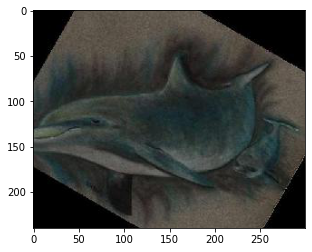

In [39]:
# Testing for custom Inputs

from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow

img_path = '/content/drive/MyDrive/SplittedDataset/val/dolphin/image_0022.jpg'
# img_path = '/content/drive/MyDrive/SplittedDataset/val/ant/image_0033.jpg'

img = image.load_img(img_path, target_size=(300, 300))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [40]:
print(model.predict(x))

[[0.5020994 0.4979006]]
